# Ejercicio: Generador de Gráficos Automático

## Instrucciones:
1. Crea una clase llamada `AutoPlot`.

2. La clase debe tener tres métodos principales:
   - `univariate_plot`: para gráficos univariantes.
   - `bivariate_plot`: para gráficos bivariantes.
   - `multivariate_plot`: para gráficos multivariantes.

3. Cada método debe recibir como argumentos:
   - `data`: un DataFrame de pandas que contiene los datos.
   - `variables`: una lista de nombres de columnas.
   - `types`: una lista de tipos correspondientes a cada columna (nominal, ordinal, continuo, discreto, fecha).
   
4. Los métodos deben seleccionar y generar automáticamente el gráfico más adecuado basado en los tipos de variables.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class AutoPlot:
    def _infer_plot_type(self, types):
        if len(types) == 1:
            if types[0] in ['continuo', 'discreto']:
                return 'histograma'
            elif types[0] in ['nominal', 'ordinal']:
                return 'barras'
        elif len(types) == 2:
            if types[0] in ['continuo', 'discreto'] and types[1] in ['continuo', 'discreto']:
                return 'dispersion'
            elif types[0] in ['nominal', 'ordinal'] and types[1] in ['continuo', 'discreto']:
                return 'cajas'
            elif types[0] in ['nominal', 'ordinal'] and types[1] in ['nominal', 'ordinal']:
                return 'contingencia'
        return None

    def _plot(self, data, variables, types, plot_type):
        if plot_type == 'histograma':
            sns.histplot(data[variables[0]])
        elif plot_type == 'barras':
            sns.countplot(x=variables[0], data=data)
        elif plot_type == 'dispersion':
            sns.scatterplot(x=variables[0], y=variables[1], data=data)
        elif plot_type == 'cajas':
            sns.boxplot(x=variables[0], y=variables[1], data=data)
        elif plot_type == 'contingencia':
             pd.crosstab(data[variables[0]], data[variables[1]]).plot(kind="bar", stacked=True)
        else:
            print("Combinación de tipos no soportada.")
            return

        plt.title(f"Gráfico de {plot_type} para {', '.join(variables)}")
        plt.show()

    def univariate_plot(self, data, variables, types):
        plot_type = self._infer_plot_type(types)
        if len(variables) != 1:
            raise ValueError("Requiere solo una variable.")
        self._plot(data, variables, types, plot_type)

    def bivariate_plot(self, data, variables, types):
        plot_type = self._infer_plot_type(types)
        if len(variables) != 2:
            raise ValueError("requiere 2 variables.")
        self._plot(data, variables, types, plot_type)
        
    def multivariate_plot(self, data, variables, types):
        if len(variables) > 2:
            numeric_vars = [variables[i] for i, t in enumerate(types) if t in ['continuo', 'discreto']]
            if len(numeric_vars) > 1:
                sns.pairplot(data[numeric_vars])
                plt.show()
            else:
                print("Se necesitan al menos dos variables numéricas para un gráfico multivariado (pairplot).")
        else:
            print("Para gráficos multivariados, necesitas más de dos variables.")


In [3]:
auto = AutoPlot()

In [4]:
pokemon = pd.read_csv('https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv')

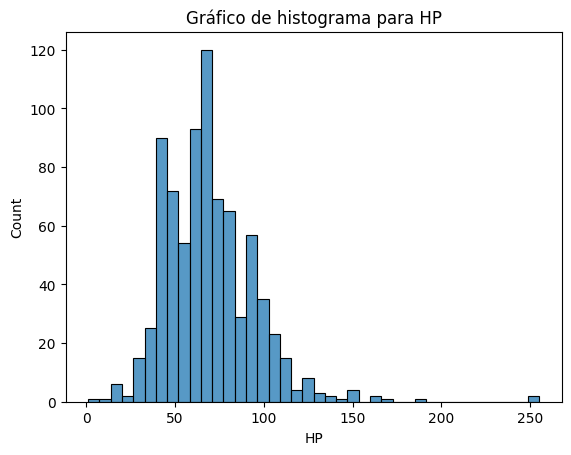

In [10]:
auto.univariate_plot(pokemon, ['HP'], ['continuo'])

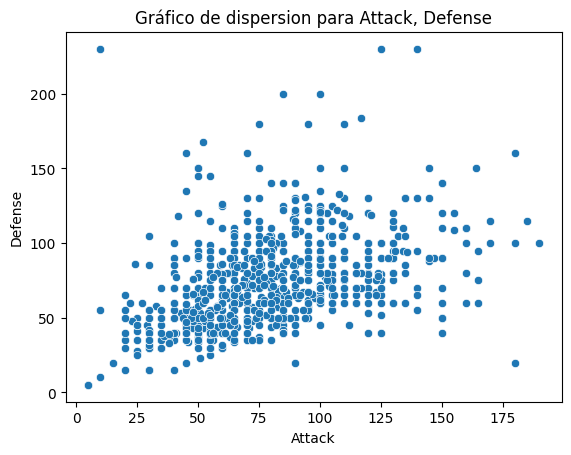

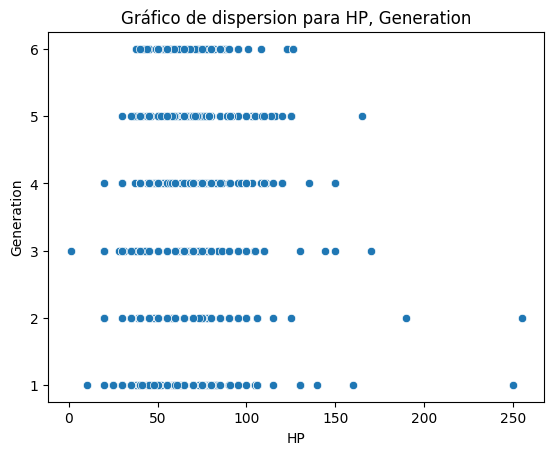

In [9]:
auto.bivariate_plot(pokemon, ['Attack', 'Defense'], ['continuo', 'continuo'])
auto.bivariate_plot(pokemon, ['HP', 'Generation'], ['continuo', 'continuo'])

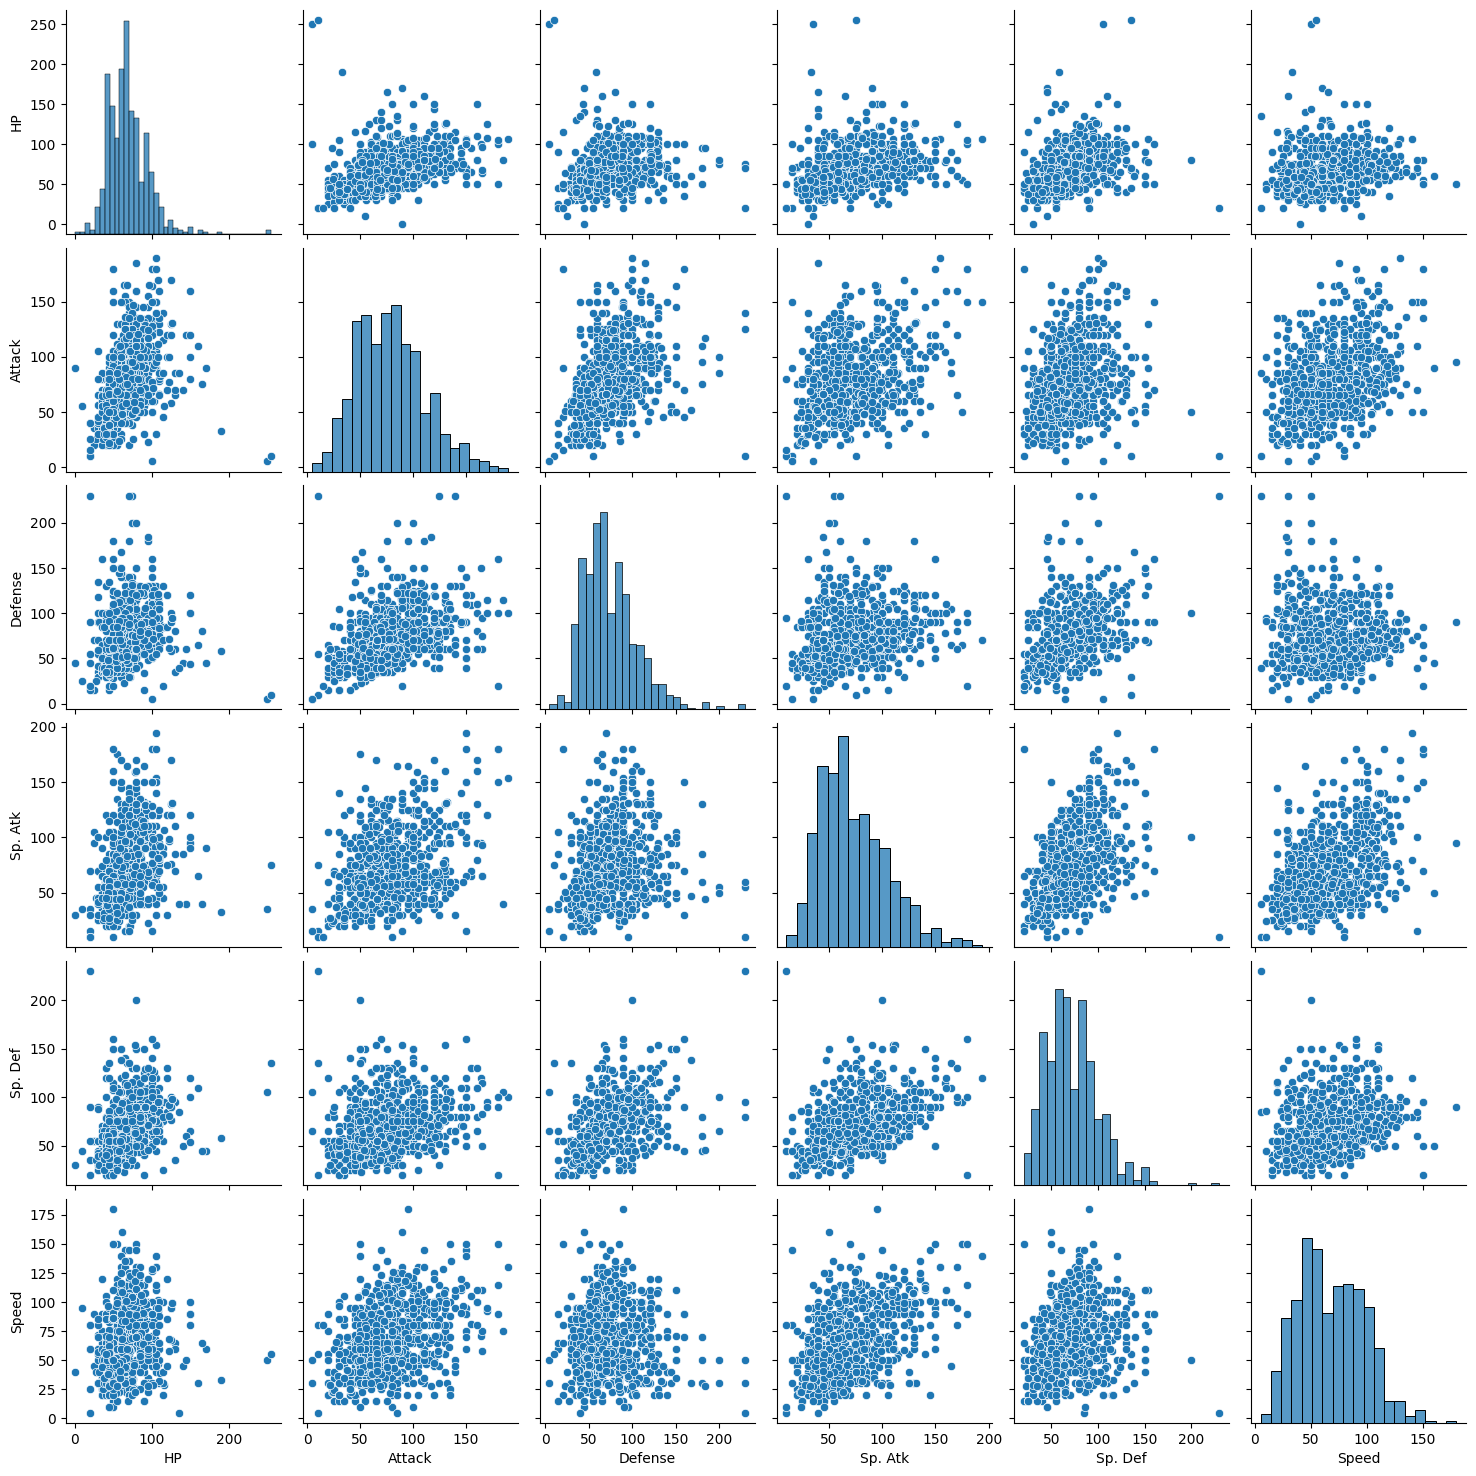

In [11]:
numeric_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
auto.multivariate_plot(pokemon, numeric_cols, ['continuo'] * len(numeric_cols))